In [81]:
import scipy.io
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Infrrd

/content/drive/MyDrive/Infrrd


In [10]:
geometry = scipy.io.loadmat('centroid_edges.mat')
density = scipy.io.loadmat('points.mat')
image = scipy.io.loadmat('binaryalphadigs.mat')
text = scipy.io.loadmat('20news_w100.mat')

# Geometry Data

In [11]:
geometry_df = pd.DataFrame(np.hstack((geometry['data'].reshape((-1, 2)), geometry['classlabels'].reshape((-1, 1)))), 
                           columns=['feature1', 'feature2', 'classlabels'])

In [13]:
X = geometry_df[['feature1', 'feature2']].to_numpy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = geometry_df['classlabels'].to_numpy()

Since we know that KMEANS and Hierarchical Ward's method are the best models. We shall use these two models to determine the optimal number of clusters

## KMEANS

In [16]:
kmeans = KMeans()

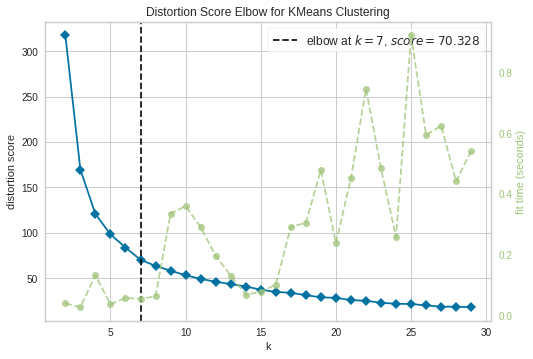

In [17]:
visualizer = KElbowVisualizer(kmeans, k=(2,30), timings= True)
visualizer.fit(X)
visualizer.show()

In [25]:
true_number_clusters = np.unique(y).shape[0]
print(f"The true number of clusters is k = {true_number_clusters}")
print(f"The Elbow Method for KMEANS however gives k = 7 ")

The true number of clusters is k = 4
The Elbow Method for KMEANS however gives k = 7 


In [29]:
kmeans = KMeans(n_clusters=7, random_state=0, n_init=50).fit(X)
kmeans_pred_clusters = kmeans.labels_
geometry_df['kmeans_pred_clusters'] = kmeans_pred_clusters.tolist()

Since kmeans is sensitive to initialization KMeans repeats the random initialization 50 times and returns the best results

We expect these clusters:

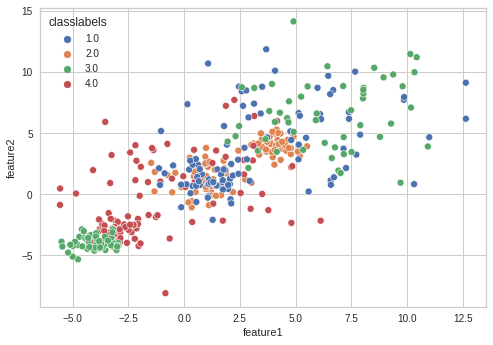

In [30]:
sns.scatterplot(x='feature1', y='feature2', hue='classlabels', data=geometry_df, palette="deep")

Our predicted clusters look something like this

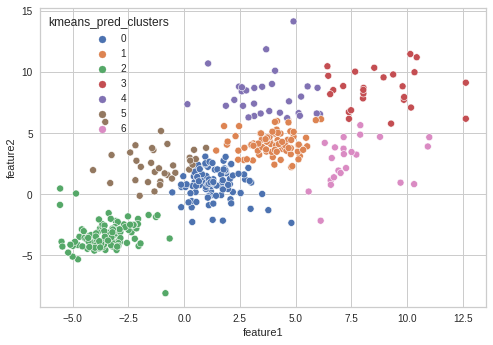

In [31]:
sns.scatterplot(x='feature1', y='feature2', hue='kmeans_pred_clusters', data=geometry_df, palette="deep")

The optimum however would be:

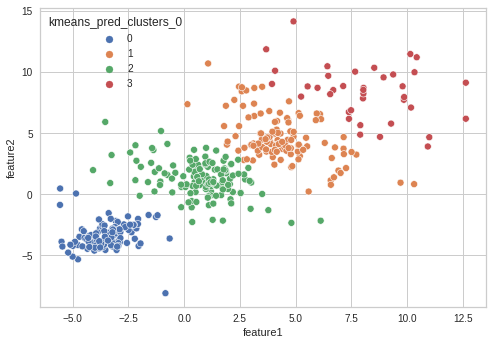

In [39]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=50).fit(X)
kmeans_pred_clusters = kmeans.labels_
geometry_df['kmeans_pred_clusters_0'] = kmeans_pred_clusters.tolist()
sns.scatterplot(x='feature1', y='feature2', hue='kmeans_pred_clusters_0', data=geometry_df, palette="deep")

## Wards

In [32]:
wards = AgglomerativeClustering(affinity='euclidean', linkage='ward')

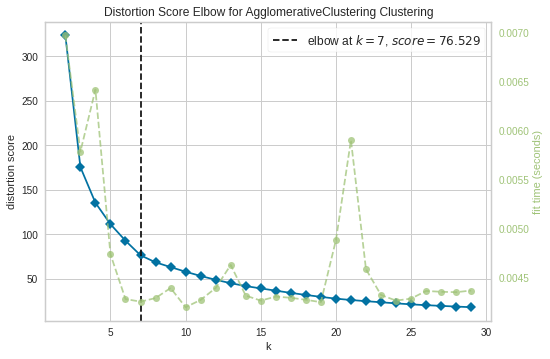

In [33]:
visualizer = KElbowVisualizer(wards, k=(2,30), timings= True)
visualizer.fit(X)
visualizer.show()

In [34]:
true_number_clusters = np.unique(y).shape[0]
print(f"The true number of clusters is k = {true_number_clusters}")
print(f"The Elbow Method for KMEANS however gives k = 7 ")

The true number of clusters is k = 4
The Elbow Method for KMEANS however gives k = 7 


In [35]:
wards = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward').fit(X)
wards_pred_clusters = wards.labels_
geometry_df['wards_pred_clusters'] = wards_pred_clusters.tolist()

We expect these clusters:

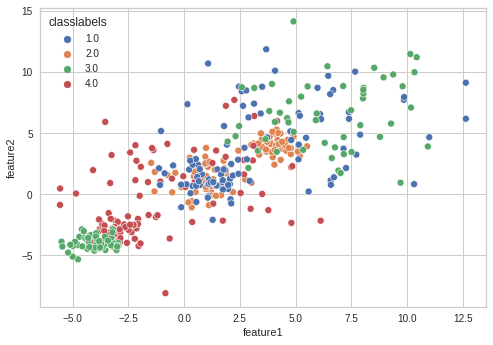

In [36]:
sns.scatterplot(x='feature1', y='feature2', hue='classlabels', data=geometry_df, palette="deep")

Our predicted clusters look something like this

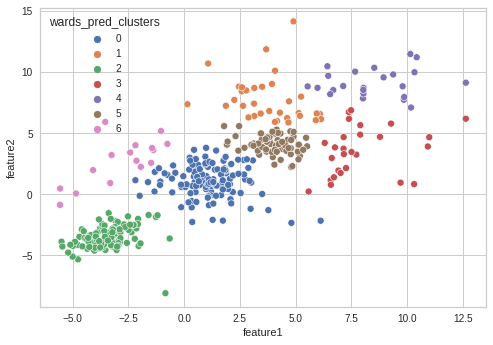

In [37]:
sns.scatterplot(x='feature1', y='feature2', hue='wards_pred_clusters', data=geometry_df, palette="deep")

The gold however would be:

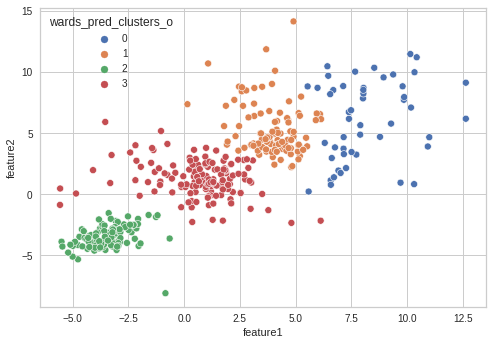

In [38]:
wards = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit(X)
wards_pred_clusters = wards.labels_
geometry_df['wards_pred_clusters_o'] = wards_pred_clusters.tolist()
sns.scatterplot(x='feature1', y='feature2', hue='wards_pred_clusters_o', data=geometry_df, palette="deep")

# Density Data

In [40]:
density_df = pd.DataFrame(np.hstack((density['data'].reshape((-1, 2)), density['classlabels'].reshape((-1, 1)))), 
                           columns=['feature1', 'feature2', 'classlabels'])

In [41]:
X = density_df[['feature1', 'feature2']].to_numpy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = density_df['classlabels'].to_numpy()

Since we know that KMEANS and Hierarchical Ward's method are the best models. We shall use these two models to determine the optimal number of clusters

## KMEANS

In [42]:
kmeans = KMeans()

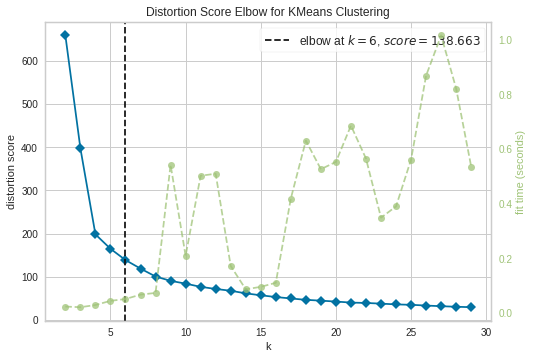

In [43]:
visualizer = KElbowVisualizer(kmeans, k=(2,30), timings= True)
visualizer.fit(X)
visualizer.show()

In [44]:
true_number_clusters = np.unique(y).shape[0]
print(f"The true number of clusters is k = {true_number_clusters}")
print(f"The Elbow Method for KMEANS however gives k = 6 ")

The true number of clusters is k = 3
The Elbow Method for KMEANS however gives k = 6 


In [45]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init=50).fit(X)
kmeans_pred_clusters = kmeans.labels_
density_df['kmeans_pred_clusters'] = kmeans_pred_clusters.tolist()

We expect these clusters:

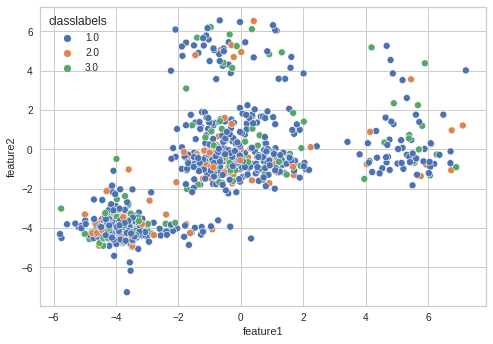

In [46]:
sns.scatterplot(x='feature1', y='feature2', hue='classlabels', data=density_df, palette="deep")

Our predicted clusters look something like this

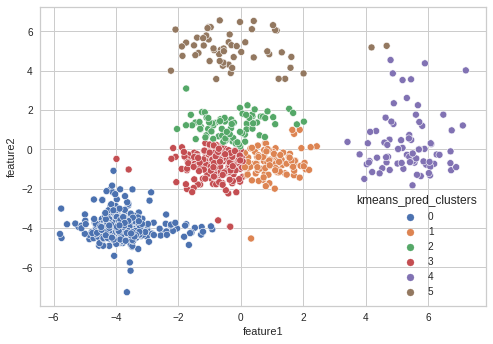

In [47]:
sns.scatterplot(x='feature1', y='feature2', hue='kmeans_pred_clusters', data=density_df, palette="deep")

The optimum however would be:

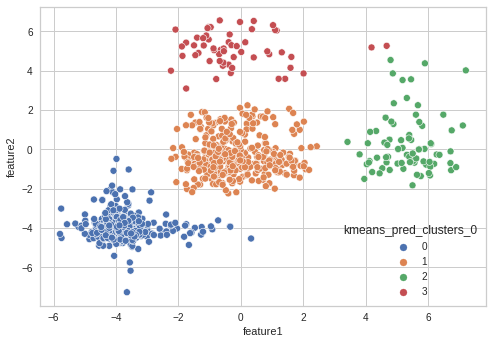

In [48]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=50).fit(X)
kmeans_pred_clusters = kmeans.labels_
density_df['kmeans_pred_clusters_0'] = kmeans_pred_clusters.tolist()
sns.scatterplot(x='feature1', y='feature2', hue='kmeans_pred_clusters_0', data=density_df, palette="deep")

## Wards

In [49]:
wards = AgglomerativeClustering(affinity='euclidean', linkage='ward')

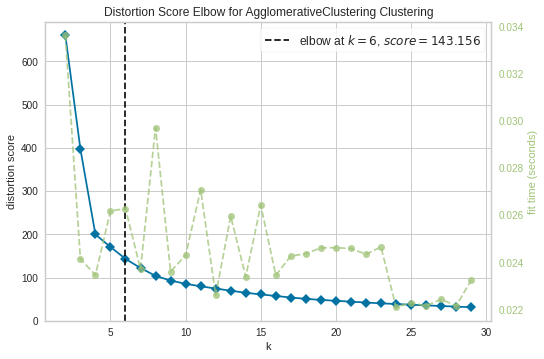

In [50]:
visualizer = KElbowVisualizer(wards, k=(2,30), timings= True)
visualizer.fit(X)
visualizer.show()

In [51]:
true_number_clusters = np.unique(y).shape[0]
print(f"The true number of clusters is k = {true_number_clusters}")
print(f"The Elbow Method for KMEANS however gives k = 6 ")

The true number of clusters is k = 3
The Elbow Method for KMEANS however gives k = 6 


In [52]:
wards = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward').fit(X)
wards_pred_clusters = wards.labels_
density_df['wards_pred_clusters'] = wards_pred_clusters.tolist()

We expect these clusters:

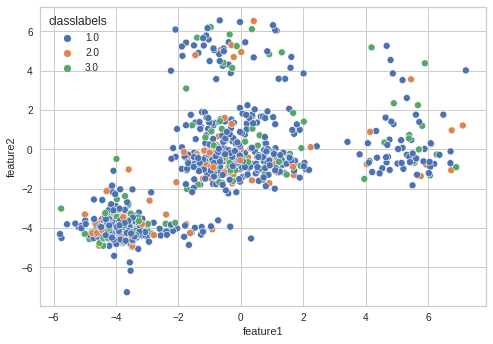

In [54]:
sns.scatterplot(x='feature1', y='feature2', hue='classlabels', data=density_df, palette="deep")

Our predicted clusters look something like this

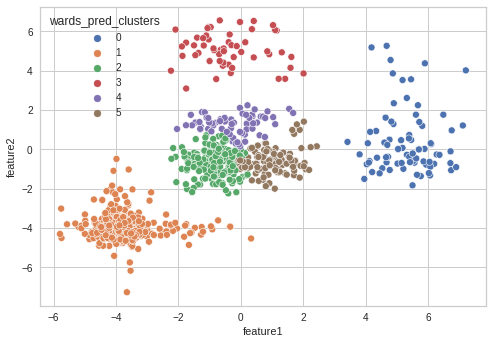

In [55]:
sns.scatterplot(x='feature1', y='feature2', hue='wards_pred_clusters', data=density_df, palette="deep")

The gold however would be:

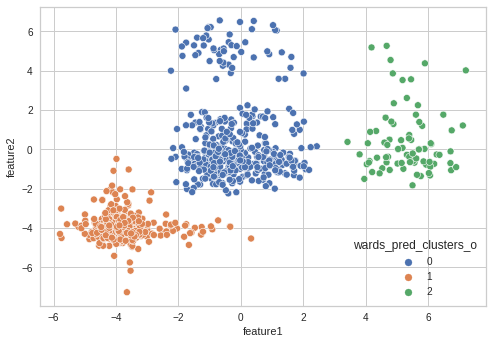

In [56]:
wards = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(X)
wards_pred_clusters = wards.labels_
density_df['wards_pred_clusters_o'] = wards_pred_clusters.tolist()
sns.scatterplot(x='feature1', y='feature2', hue='wards_pred_clusters_o', data=density_df, palette="deep")

# Text Data

In [62]:
wordlist = [text['wordlist'][0][i][0] for i in range(100)]

In [57]:
columns=['document', 'category', 'classlabels']
document_df = pd.DataFrame(columns=columns)

In [59]:
num_documents = text['documents'].toarray().shape[1]
print(f"We have {num_documents} documents")

We have 16242 documents


In [60]:
categories = [cat[0] for cat in text['groupnames'][0]]
print("We have these categories:")
print('\n'.join(categories))

We have these categories:
comp.*
rec.*
sci.*
talk.*


In [63]:
ni = 0
documents = text['documents'].toarray().reshape((-1, 100))
labels = text['newsgroups'][0]
for i in range(num_documents):
    many_hot_encoding = documents[i]
    li = labels[i]
    label = categories[li - 1]
    document_tokens = [wordlist[i] for i, present in enumerate(many_hot_encoding) if present]
    document = " ".join(document_tokens)
    document = document if document else None
    row_list = [document, label, li]
    row = dict(zip(columns, row_list))
    document_df = document_df.append(row, ignore_index=True)     

In [64]:
document_df = document_df.dropna()
print("Shape: ", document_df.shape)
document_df.sample(10)

Shape:  (8895, 3)


,document,category,classlabels
2926,dealer lunar mars oil pc rights studies univer...,comp.*,1
2673,christian launch,comp.*,1
8060,question,rec.*,2
7078,drive hit law nhl,rec.*,2
10186,problem,sci.*,3
2045,drive driver earth email league lunar nhl reli...,comp.*,1
9506,course display mac phone question satellite st...,sci.*,3
11696,bmw disk launch problem research war world,talk.*,4
12316,aids children computer doctor food human jesus...,talk.*,4
14856,win,talk.*,4


In [65]:
def normalize(data, num_features=100):
    scaler = StandardScaler()
    scaler.fit(data)
    data = scaler.transform(data)
    pca = PCA(n_components=num_features, random_state=22)
    pca.fit(data)
    x = pca.transform(data)
    return x

In [70]:
corpus = document_df['document'].tolist()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X = X.toarray()
X = normalize(X, 50)

In [71]:
y = document_df['classlabels'].to_numpy()

Since we know that KMEANS and Hierarchical Ward's method are the best models. We shall use these two models to determine the optimal number of clusters

## KMEANS

In [87]:
kmeans = KMeans()

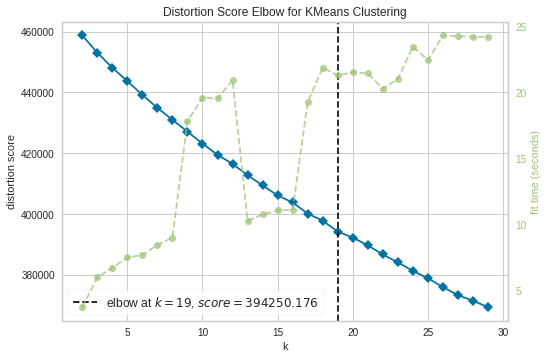

In [89]:
visualizer = KElbowVisualizer(kmeans, k=(2,30), timings=True)
visualizer.fit(X)
visualizer.show()

In [78]:
true_number_clusters = np.unique(y).shape[0]
print(f"The true number of clusters is k = {true_number_clusters}")
print(f"The Elbow Method for KMEANS however gives k = 19 ")

The true number of clusters is k = 4
The Elbow Method for KMEANS however gives k = 22 


In [79]:
kmeans = KMeans(n_clusters=22, random_state=0, n_init=50).fit(X)
kmeans_pred_clusters = kmeans.labels_

In [82]:
kmeans_score = metrics.rand_score(y, kmeans_pred_clusters)
print("KMEANS: ", kmeans_score)

KMEANS:  0.6887621910824547


We can also try using Silhouette Coefficient

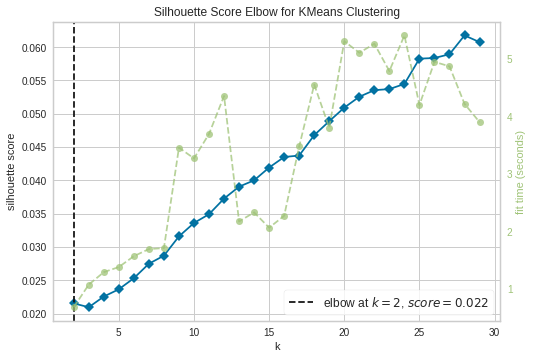

In [76]:
visualizer = KElbowVisualizer(kmeans, k=(2,30), timings=True, metric='silhouette')
visualizer.fit(X)
visualizer.show()

In [77]:
true_number_clusters = np.unique(y).shape[0]
print(f"The true number of clusters is k = {true_number_clusters}")
print(f"The Silhouette Method for KMEANS however gives k = 2 ")

The true number of clusters is k = 4
The Silhouette Method for KMEANS however gives k = 2 


In [83]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50).fit(X)
kmeans_pred_clusters = kmeans.labels_

In [84]:
kmeans_score = metrics.rand_score(y, kmeans_pred_clusters)
print("KMEANS: ", kmeans_score)

KMEANS:  0.47837139513245314


The optimum however would be:

In [85]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=50).fit(X)
kmeans_pred_clusters = kmeans.labels_

In [86]:
kmeans_score = metrics.rand_score(y, kmeans_pred_clusters)
print("KMEANS: ", kmeans_score)

KMEANS:  0.587808595217952


## DBSCAN

DBSCAN works better for the text data and it also predicts the number of clusters correctly

In [90]:
#### DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
dbscan_pred_clusters = db.labels_

# Number of clusters 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Numbger of clusters: {n_clusters_}")

Numbger of clusters: 4


## Wards

In [91]:
wards = AgglomerativeClustering(affinity='euclidean', linkage='ward')

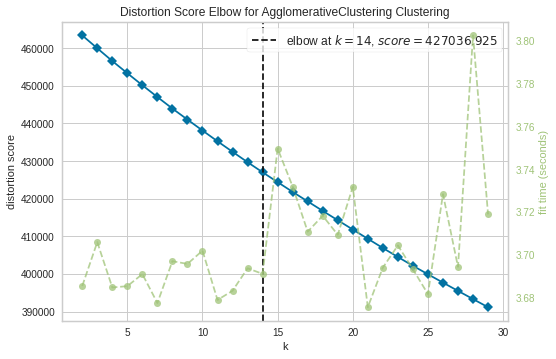

In [92]:
visualizer = KElbowVisualizer(wards, k=(2,30), timings= True)
visualizer.fit(X)
visualizer.show()

In [93]:
true_number_clusters = np.unique(y).shape[0]
print(f"The true number of clusters is k = {true_number_clusters}")
print(f"The Elbow Method for KMEANS however gives k = 14 ")

The true number of clusters is k = 4
The Elbow Method for KMEANS however gives k = 14 


In [94]:
wards = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='ward').fit(X)
wards_pred_clusters = wards.labels_

In [95]:
wards_score = metrics.rand_score(y, wards_pred_clusters)
print("Wards: ", wards_score)

Wards:  0.6607661808625301


In [96]:
wards = AgglomerativeClustering(affinity='euclidean', linkage='ward')

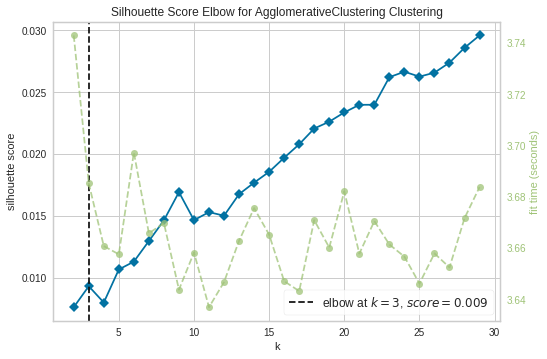

In [97]:
visualizer = KElbowVisualizer(wards, k=(2,30), timings= True, metric="silhouette")
visualizer.fit(X)
visualizer.show()

In [98]:
true_number_clusters = np.unique(y).shape[0]
print(f"The true number of clusters is k = {true_number_clusters}")
print(f"The Elbow Method for KMEANS however gives k = 3 ")

The true number of clusters is k = 4
The Elbow Method for KMEANS however gives k = 3 


In [99]:
wards = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(X)
wards_pred_clusters = wards.labels_

In [100]:
wards_score = metrics.rand_score(y, wards_pred_clusters)
print("Wards: ", wards_score)

Wards:  0.5063668997409121
